<a href="https://colab.research.google.com/github/Stanslusokurut/Sales-Prediction/blob/main/Stanslus_Kaggle_Reviewed_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import Libraries 
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.python.client import device_lib

import itertools


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import IsolationForest

import warnings

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

os.environ['TF_CPP_MIN_LOG_LEVEL'] = "99"
device_lib.list_local_devices()
import sys
sys.path.insert(0, '..')

%matplotlib inline

import numpy as np
import pandas as pd


In [4]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Import data
train_data = pd.read_csv('/content/drive/MyDrive/Data Science/Datasets/Machine Learning Data/Kaggle/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Data Science/Datasets/Machine Learning Data/Kaggle/test.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


PROCESSING THE DATA

In [6]:
# 1. Excluding columns which have majority as null
train_data= train_data.loc[:, train_data.isnull().sum()/len(train_data)<0.80]

x= train_data.iloc[:, 1:-1] # Dropping 'Id' and the Y feature
y= train_data.iloc[:,-1]

train_cols= x.columns
print(train_data.shape, x.shape, y.shape)

(1460, 77) (1460, 75) (1460,)


In [7]:
# 2. Looking at the Overall statistics of variables and correlation among all variables
train_stats= x.describe().transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [8]:
ordinal_cols= list(x.columns[x.columns.str.contains('Yr|Year')])
print('ordinal/temporal columns:\n',ordinal_cols)
nominal_cols= list(set(x.select_dtypes(include=['object']).columns)- set(ordinal_cols))
print('nominal columns:\n', nominal_cols)
numeric_cols= list(set(x.select_dtypes(exclude=['object']).columns)- set(ordinal_cols))
print('numeric columns:\n',numeric_cols)

ordinal/temporal columns:
 ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
nominal columns:
 ['HeatingQC', 'Neighborhood', 'RoofStyle', 'LotShape', 'SaleCondition', 'LandContour', 'GarageFinish', 'Heating', 'BsmtCond', 'GarageCond', 'CentralAir', 'BldgType', 'GarageQual', 'LandSlope', 'BsmtQual', 'PavedDrive', 'MasVnrType', 'Functional', 'HouseStyle', 'LotConfig', 'Foundation', 'GarageType', 'MSZoning', 'Utilities', 'Electrical', 'ExterCond', 'Condition2', 'RoofMatl', 'Condition1', 'FireplaceQu', 'ExterQual', 'Exterior2nd', 'Street', 'BsmtExposure', 'SaleType', 'KitchenQual', 'BsmtFinType2', 'BsmtFinType1', 'Exterior1st']
numeric columns:
 ['PoolArea', 'MoSold', 'OpenPorchSF', 'LotFrontage', 'BsmtHalfBath', 'FullBath', '3SsnPorch', 'BsmtFullBath', 'MiscVal', 'TotalBsmtSF', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'BsmtFinSF1', 'OverallQual', 'GarageCars', 'BsmtFinSF2', '2ndFlrSF', '1stFlrSF', 'HalfBath', 'LowQualFinSF', 'BedroomAbvGr', 'LotArea', 'MSSubClass', 'BsmtUnfSF', 

In [9]:
# Checking unique values
x[nominal_cols].describe().transpose()

,count,unique,top,freq
HeatingQC,1460,5,Ex,741
Neighborhood,1460,25,NAmes,225
RoofStyle,1460,6,Gable,1141
LotShape,1460,4,Reg,925
SaleCondition,1460,6,Normal,1198
LandContour,1460,4,Lvl,1311
GarageFinish,1379,3,Unf,605
Heating,1460,6,GasA,1428
BsmtCond,1423,4,TA,1311
GarageCond,1379,5,TA,1326


In [10]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.20, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1168, 75), (292, 75), (1168,), (292,))

In [11]:
#IMPUTE MISSING VALUES
#Fuction to find number of missing values in each category  

def missing_val_imputation(x, ordinal_cols,nominal_cols,numeric_cols):
    
    for col in ordinal_cols:
        x.loc[:,col]= x.loc[:,col].fillna(x.loc[:,col].mean())

    x.loc[:,nominal_cols]= x.loc[:,nominal_cols].fillna("?")
    
    for col in numeric_cols:
        x.loc[:,col]= x.loc[:,col].fillna(x.loc[:,col].mean())
#         x.loc[:,col]= x.groupby("OverallQual")[col].transform(lambda grp:grp.fillna(np.mean(grp)))
    print("All missing values are now imputed!\n",x.isnull().sum().sort_values(ascending=False))
    
    return x

In [12]:
#Fİnding # of missing values in train and test splits

x_train= missing_val_imputation(x_train,ordinal_cols,nominal_cols,numeric_cols)
x_test= missing_val_imputation(x_test,ordinal_cols,nominal_cols,numeric_cols)

All missing values are now imputed!
 MSSubClass       0
GarageType       0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
                ..
MasVnrArea       0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
SaleCondition    0
Length: 75, dtype: int64
All missing values are now imputed!
 MSSubClass       0
GarageType       0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
                ..
MasVnrArea       0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
SaleCondition    0
Length: 75, dtype: int64


In [14]:
from sklearn.preprocessing import OneHotEncoder
# Fitting OHE object
ohe= OneHotEncoder(handle_unknown='ignore', sparse=False).fit(x_train[nominal_cols]) 

#Feature Encoding for nominal columns

def ohe_transform(x, ohe, nominal_cols):
    x_ohe= pd.DataFrame(ohe.transform(x[nominal_cols]))
    x_ohe.columns=ohe.get_feature_names_out(nominal_cols)

    # prepping x
    x=x.drop(nominal_cols, axis=1)
    x.reset_index(inplace=True, drop=True)
    x= x.merge(x_ohe, left_index=True, right_index=True)
    
    return x

x_train= ohe_transform(x_train, ohe, nominal_cols)
x_test= ohe_transform(x_test, ohe, nominal_cols)
x_train.shape, x_test.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((1168, 283), (292, 283))

In [15]:
from sklearn.preprocessing import StandardScaler

# Standard Scaling
ss= StandardScaler()
x_train_ss= pd.DataFrame(ss.fit_transform(x_train))
x_test_ss= pd.DataFrame(ss.transform(x_test))
x_train.shape, x_train_ss.shape, x_test_ss.shape, y_train.shape

((1168, 283), (1168, 283), (292, 283), (1168,))

FEATURE SELECTION 

In [16]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

sel= SelectFromModel(Lasso(alpha=0.5, max_iter=3000, tol=0.005, random_state=0, warm_start= False)) # warm_start= True

# train the lasso model and select features
sel.fit(x_train_ss, y_train)

sel.get_support()

selected_feats= x_train_ss.columns[(sel.get_support())]

# print the stats
print("# of total features: ",x_train.shape[1])
print("# of selected features: ",len(selected_feats))
# print("# of rejected features: ",np.sum(sel.estimator_.coef_==0))
# print('Selected features:', selected_feats)

x_train_ss= x_train_ss[selected_feats]
x_test_ss= x_test_ss[selected_feats]

x_train_ss.shape, x_test_ss.shape

# of total features:  283
# of selected features:  264


((1168, 264), (292, 264))

In [17]:
x_train.columns[10]
x_train['BsmtUnfSF']

0       1774
1        894
2        163
3        350
4       1541
        ... 
1163      89
1164     625
1165       0
1166    1374
1167    1195
Name: BsmtUnfSF, Length: 1168, dtype: int64

In [18]:
x_train_ss[10]

0       2.757198
1       0.745229
2      -0.926076
3      -0.498533
4       2.224484
          ...   
1163   -1.095265
1164    0.130207
1165   -1.298748
1166    1.842667
1167    1.433414
Name: 10, Length: 1168, dtype: float64

BUILD A NEURAL NETWORK

In [19]:
# Building a neural network
import keras

optimizer= tf.keras.optimizers.Adam(0.001)

normal_model = Sequential()
normal_model.add(Dense(128, input_shape=[len(x_train_ss.keys())], kernel_initializer='normal', activation='relu'))
normal_model.add(Dense(64, kernel_initializer='normal', activation='relu'))
normal_model.add(Dense(32, kernel_initializer='normal', activation='relu'))
normal_model.add(Dense(1, kernel_initializer='normal'))
normal_model.compile(loss='mse', optimizer = optimizer, metrics=['mean_absolute_error','mean_squared_error'])

# Build and inspect the model

normal_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               33920     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 44,289
Trainable params: 44,289
Non-trainable params: 0
_________________________________________________________________


In [20]:
#TRAIN MODEL & EVALUATE
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min', restore_best_weights=False)

history= normal_model.fit(
    x_train_ss, y_train,
    epochs=200,
    validation_data=(x_test_ss, y_test),
    verbose=0, #set verbose=1 for full details at every epoch
    callbacks= [early_stopping_cb])

loss, mae, mse= normal_model.evaluate(x_test_ss, y_test, verbose=2)

print("Test-set Mean absolute error: {:5.2f}".format(mae)) # test mae- 30797

Epoch 67: early stopping
10/10 - 0s - loss: 3927187712.0000 - mean_absolute_error: 30797.3535 - mean_squared_error: 3927187712.0000 - 37ms/epoch - 4ms/step
Test-set Mean absolute error: 30797.35


In [21]:
loss, mae, mse= normal_model.evaluate(x_test_ss, y_test, verbose=2)

print("Test-set Mean absolute error: {:5.2f}".format(mae)) # test mae- 07797

10/10 - 0s - loss: 3927187712.0000 - mean_absolute_error: 30797.3535 - mean_squared_error: 3927187712.0000 - 40ms/epoch - 4ms/step
Test-set Mean absolute error: 30797.35


Text(0.5, 1.0, 'Train - MAE')

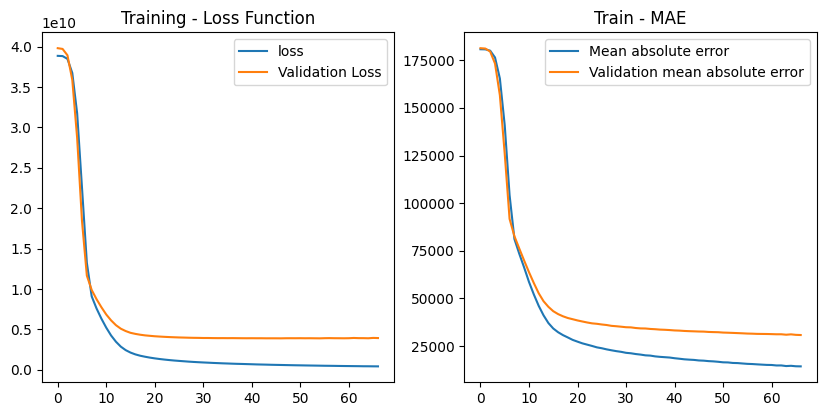

In [22]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Mean absolute error')
plt.plot(history.history['val_mean_absolute_error'], label='Validation mean absolute error')
plt.legend()
plt.title('Train - MAE')

10/10 [==============================] - 0s 2ms/step


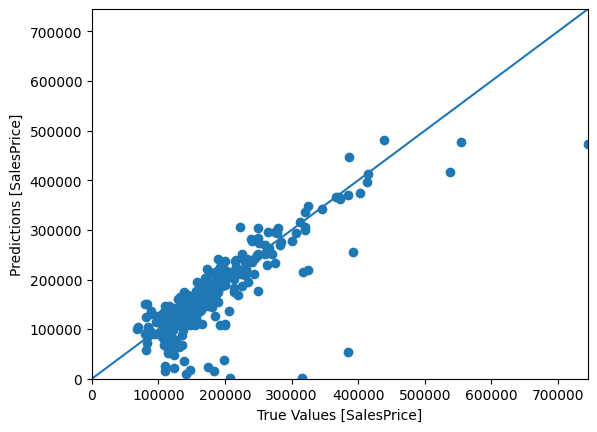

In [23]:
#Predict tests
y_pred_test= normal_model.predict(x_test_ss).flatten()

# a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_test)
plt.xlabel('True Values [SalesPrice]')
plt.ylabel('Predictions [SalesPrice]')

lims=[0, max(y_test)]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

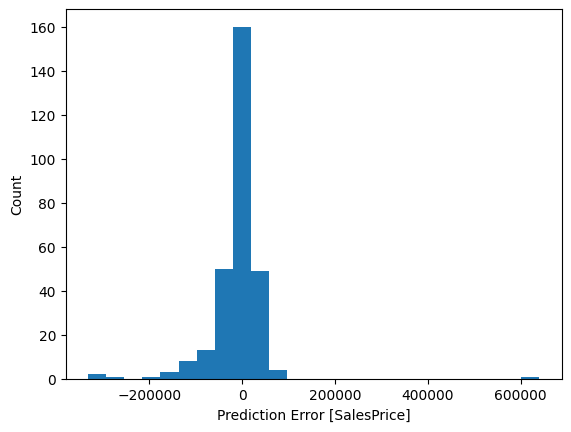

In [24]:
#ERROR DISTRIBUTION 
error= y_pred_test-y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [SalesPrice]')
_=plt.ylabel('Count')

In [28]:
# Importing Test data
test_data= pd.read_csv('/content/drive/MyDrive/Data Science/Datasets/Machine Learning Data/Kaggle/test.csv')

# Considering same columns which are used for training
test_data= test_data[train_cols]

test_data.shape

# Preprocessing the test dataset
test_data= missing_val_imputation(test_data,ordinal_cols,nominal_cols,numeric_cols)

test_data= ohe_transform(test_data, ohe, nominal_cols)

test_data_ss= pd.DataFrame(ss.transform(test_data))

test_data_ss= test_data_ss[selected_feats]

test_data.shape, test_data_ss.shape

All missing values are now imputed!
 MSSubClass       0
GarageType       0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
                ..
MasVnrArea       0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
SaleCondition    0
Length: 75, dtype: int64


((1459, 283), (1459, 264))

In [29]:
# MAKE PREDICTIONS USING THE UNTUNED MODEL
test_predictions= normal_model.predict(test_data_ss).flatten()

46/46 [==============================] - 0s 2ms/step


In [30]:
test_predictions[0]

116783.516

In [31]:
test_predictions

array([116783.516, 159290.08 , 189741.11 , ..., 204587.7  ,  79427.38 ,
       226432.77 ], dtype=float32)

In [35]:
#SUBMIT DATA
submission = pd.read_csv('/content/drive/MyDrive/Data Science/Datasets/Machine Learning Data/Kaggle/sample_submission.csv')
submission.iloc[:,1]= np.array(test_predictions)


submission.to_csv("submission.csv",index=False)

<ipython-input-35-d313bf6e77a3>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  submission.iloc[:,1]= np.array(test_predictions)


SUBMITTED DATA ON KAGGLE

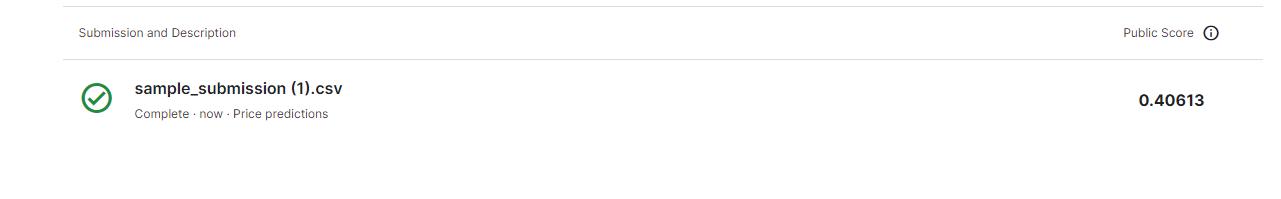